Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 150.3333282470703
Epoch 1 - loss: 6.120000839233398
Epoch 2 - loss: 36.42483139038086
Epoch 3 - loss: 18.104551315307617
Epoch 4 - loss: 6.065778732299805
Epoch 5 - loss: 10.36883544921875
Epoch 6 - loss: 6.2322306632995605
Epoch 7 - loss: 5.852260589599609
Epoch 8 - loss: 6.088119983673096
Epoch 9 - loss: 5.494865417480469
Epoch 10 - loss: 5.574592590332031
Epoch 11 - loss: 5.536750793457031
Epoch 12 - loss: 5.476492404937744
Epoch 13 - loss: 5.4938530921936035
Epoch 14 - loss: 5.480627536773682
Epoch 15 - loss: 5.477013111114502
Epoch 16 - loss: 5.478647232055664
Epoch 17 - loss: 5.476379871368408
Epoch 18 - loss: 5.476480007171631
Epoch 19 - loss: 5.4764628410339355
Epoch 20 - loss: 5.47619104385376
Epoch 21 - loss: 5.476251602172852
Epoch 22 - loss: 5.476212978363037
Epoch 23 - loss: 5.476190567016602
Epoch 24 - loss: 5.476199626922607
E

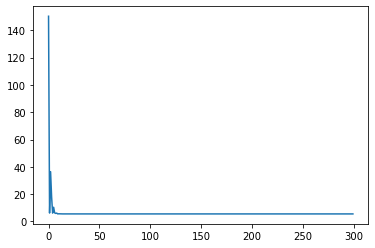

In [11]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []

############## Batch GD based update ##############       
      
for epoch in range(300):   
    optimizer.zero_grad()
    outputs = net(data)
    loss = criterion(outputs, target)
    loss.backward()
    hist.append(loss.detach())
    optimizer.step()
    print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")

Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
i 0 Epoch 0 - loss: 9.0
i 1 Epoch 0 - loss: 60.840003967285156
i 2 Epoch 0 - loss: 48.16359329223633
i 0 Epoch 1 - loss: 47.52723693847656
i 1 Epoch 1 - loss: 193.33233642578125
i 2 Epoch 1 - loss: 1.0173128843307495
i 0 Epoch 2 - loss: 0.45298048853874207
i 1 Epoch 2 - loss: 24.202863693237305
i 2 Epoch 2 - loss: 88.83402252197266
i 0 Epoch 3 - loss: 41.247581481933594
i 1 Epoch 3 - loss: 182.4311065673828
i 2 Epoch 3 - loss: 1.685847282409668
i 0 Epoch 4 - loss: 0.5527670979499817
i 1 Epoch 4 - loss: 23.358642578125
i 2 Epoch 4 - loss: 89.11278533935547
i 0 Epoch 5 - loss: 40.98900604248047
i 1 Epoch 5 - loss: 181.1503143310547
i 2 Epoch 5 - loss: 1.635256290435791
i 0 Epoch 6 - loss: 0.573534369468689
i 1 Epoch 6 - loss: 22.94943618774414
i 2 Epoch 6 - loss: 88.66230010986328
i 0 Epoch 7 - loss: 40.82246398925781
i 1 Epoch 7 - loss: 180.02647399902344
i 

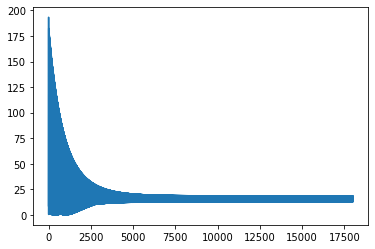

In [10]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []
############## SGD based update ##############
for epoch in range(6000): 
    for i in range(3): 
        X, Y = data[i], target[i]
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        hist.append(loss.detach())
        print("i {} Epoch {} - loss: {}".format(i,epoch, loss))
###Test the trained network
for i in range(3):
    X, Y = data[i], target[i]
    out = net(torch.FloatTensor(X))
    print("when x = {}， y = {}".format(X, out))
plt.plot(hist, label = "training curve")